    b      x       y
0   1  2.728   9.088
1   1  3.244  12.786
2   1 -4.164 -10.016
3   1  4.875  32.976
4   1  3.329  10.437
5   1  4.268  21.681
6   1 -2.879  -5.204
7   1 -2.276  -1.465
8   1  2.688   8.539
9   1  2.780   6.929
10  1  3.874  15.765
11  1 -4.826 -15.577
12  1  2.633  11.382
13  1  2.815   9.853
14  1  4.441  24.914
15  1  1.345   3.977
16  1 -4.616 -15.291
17  1  1.405  -0.154
18  1 -2.588  -0.988
19  1  0.992  -1.133
20  1  3.276  10.743
21  1 -0.597   0.536
22  1 -3.772  -6.342
23  1 -2.848  -1.673
24  1  4.310  25.919


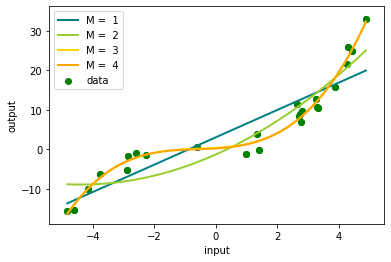

In [1]:
#----------- Question2(a) -----------#
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import math 


data = pd.read_csv('regression_part2.csv')
data.columns = ['x','y']
data = data.reindex(columns=list('b') + list(data.columns), fill_value=1)


print(data)
plt.scatter(data['x'], data['y'], color = 'green',label = 'data')
line_x = np.linspace(data['x'].min(), data['x'].max(), 100)[:, np.newaxis]
line_xx = np.concatenate(( np.array([[1] for i in range(100)]), line_x),axis = 1)


colors = ['teal', 'yellowgreen', 'gold','orange']
plt.scatter(data['x'], data['y'], color = 'green')
for count, degree in enumerate([1, 2, 3,4]):
    model = make_pipeline(PF(degree), LR(fit_intercept = False))
    model.fit(data.iloc[:,1:2], data.iloc[:,2])
    y_plot = model.predict(line_x)
    plt.plot(line_x, y_plot, color=colors[count], linewidth=2, label="M =  %d" % degree)

plt.xlabel('input')
plt.ylabel('output')
plt.legend()
plt.savefig("IAML_Q2a.png")
plt.show()

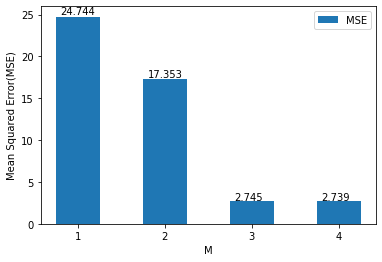

In [2]:
#----------- Question2(b) -----------#

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.01*height, '%s' % float(height))


mse = []
for count, degree in enumerate([1, 2, 3,4]):
    model = make_pipeline(PF(degree), LR(fit_intercept = False))
    a = model.fit(data.iloc[:,1:2], data.iloc[:,2])    
    yy = model.predict(data.iloc[:, 1:2])
    sum = format(MSE(yy, data['y']),'.3f')

    mse.append(sum)
M = [1,2,3,4]
x = np.array(mse)
y = x.astype(np.float)
a =plt.bar(M, y, width=0.5, label = 'MSE')
plt.xticks(M, ('1', '2', '3', '4'))
plt.xlabel("M")
autolabel(a)
plt.ylabel("Mean Squared Error(MSE)")
plt.legend()
plt.savefig("IAML_Q2b.png")
plt.show()

Question2 (d) of IAML

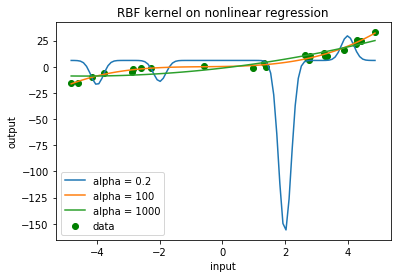

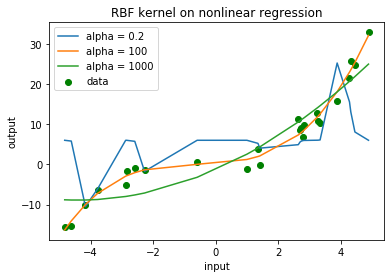

In [5]:
#----------- Question2(d) -----------#
c1 = -4.0
c2 = -2.0
c3 = 2.0
c4 = 4.0
plt.scatter(data['x'], data['y'], color = 'green', label = 'data')
line_x = np.linspace(data['x'].min(),data['x'].max(),100)
line_xx = np.array(line_x)
def RBF(data,alpha):
    c_x = np.concatenate(( np.array([[1] for i in range(len(data))]), np.exp(-0.5 * np.square(np.array([data- c1]) / alpha)).T), axis = 1)
    c_x = np.concatenate(( c_x, np.exp(-0.5 * np.square(np.array([data- c2]) / alpha)).T), axis = 1)
    c_x = np.concatenate(( c_x, np.exp(-0.5 * np.square(np.array([data- c3]) / alpha)).T), axis = 1)
    c_x = np.concatenate(( c_x, np.exp(-0.5 * np.square(np.array([data- c4]) / alpha)).T), axis = 1)
    return c_x

for a in [ 0.2, 100, 1000]:
    c_x = RBF(data['x'],alpha = a)
    model = LR(fit_intercept = False)
    model.fit(c_x, data['y'])
    line_y = model.predict(RBF(line_xx, alpha = a))
    plt.title("RBF kernel on nonlinear regression")
    plt.plot(line_x, line_y, label = "alpha = " + str(a))
   # plt.plot(data['x'], line_y, label = "a = " + str(a))
    plt.legend()
    
plt.xlabel("input")
plt.ylabel("output")
plt.savefig('IAML_Q2d1.png')
plt.show()

plt.scatter(data['x'], data['y'], color = 'green', label = 'data')
for a in [ 0.2, 100, 1000]:
    set1 = []
    c_x = RBF(data['x'],alpha = a)
    model = LR(fit_intercept = False)
    model.fit(c_x, data['y'])
    line_y = model.predict(RBF(data['x'], alpha = a))
    plt.title("RBF kernel on nonlinear regression")
    #plt.plot(data['x'], line_y, label = "a = " + str(a))
    for i in range(len(data['x'])):
        set1.append([data['x'][i], line_y[i]])
    set1 =np.array(sorted(set1))
    
    plt.plot(set1[:,0], set1[:,1], label = "alpha = " + str(a))
    plt.legend()
    
plt.xlabel("input")
plt.ylabel("output")
plt.savefig('IAML_Q2d2.png')
plt.show()

